# RandomForestClassifier

In [4]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc,  f1_score, precision_score, recall_score, jaccard_score, log_loss, roc_auc_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 
import joblib


pd.set_option('display.max_columns', None)
pd.set_option('display.precision' , 2)



##### Read the processed data to train

In [5]:
def read_data(file_path):
    """
    Read data from a CSV file into a pandas DataFrame.
    
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print("Error: File not found.")
        return None
    
processed_datafarme = read_data('../data/processed/train_model_data.csv')

processed_datafarme.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,BusinessTravel_Non-Travel,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.46e-01,1,0.74,-1.01,2,-1.73,2,0,1.38,3,4,0.73,8.0,1,11,1,0.0,0.5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.32e+00,0,-1.30,-0.15,1,-1.73,3,1,-0.24,2,2,1.49,1.0,0,23,4,1.0,3.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8.34e-03,1,1.41,-0.89,2,-1.73,4,1,1.28,2,3,-1.67,6.0,1,15,2,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Split the target and feature variables  

In [6]:
def split_data(df, target_column):
   
    x = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable
    return x, y

x , y = split_data(processed_datafarme,'Attrition')

##### Split the data into Train-Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2352, 36)
X_test shape: (588, 36)
y_train shape: (2352,)
y_test shape: (588,)


In [8]:
# Cleaning test sets to avoid future warning messages
y_train = y_train.values.ravel() 
y_test = y_test.values.ravel() 

In [9]:
random_forest_tree = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [2,3,4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4 ],
    'min_samples_leaf': [1, 2, 3, 4],
             }

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(random_forest_tree, param_grid, cv=10,  n_jobs = 3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

c:\Users\samee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
983 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\samee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\samee\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\samee\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\samee\anaconda3\Lib\site-pack

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [28]:
#final model of decision tree
top_model_random_forest_tree = RandomForestClassifier(bootstrap=True, min_samples_leaf=2, min_samples_split=2, criterion='entropy', max_features='log2', max_depth=4)

top_model_random_forest_tree.fit(X_train, y_train)

MODEL_TRAIN_SCORE = top_model_random_forest_tree.score(X_train, y_train)

print(f"Training score for Model: {MODEL_TRAIN_SCORE * 100:.2f}%")

#test model

TEST_MODEL_SCORE = top_model_random_forest_tree.score(X_test, y_test)

print(f"Testing score for Model: {TEST_MODEL_SCORE * 100:.2f}%")

Training score for Model: 84.06%
Testing score for Model: 83.16%


##### OOB ERROR

Best OOB error: 0.15603741496598644 at n_estimators: 18


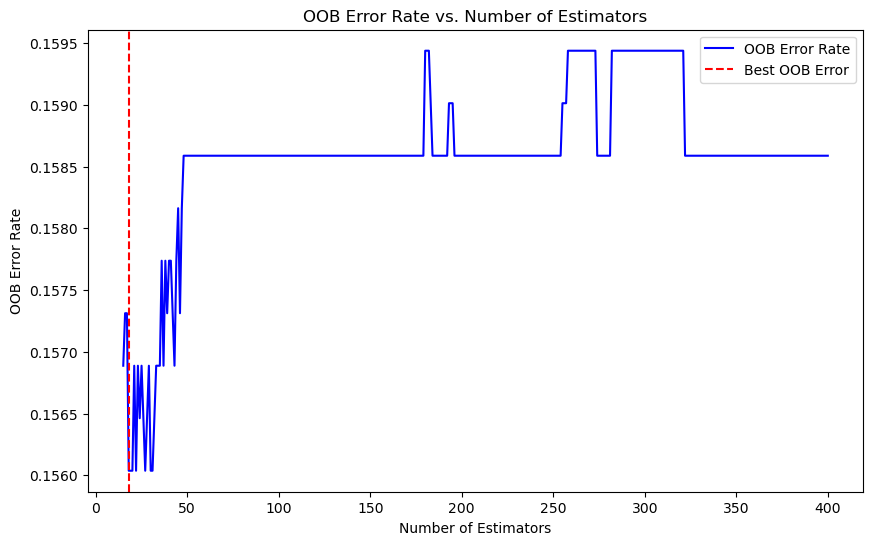

In [11]:
min_estimators = 15
max_estimators = 400  # or any other appropriate upper limit

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    top_model_random_forest_tree.set_params(n_estimators=i)
    top_model_random_forest_tree.fit(X_train, y_train)

     # Compute OOB error manually
    oob_error = 1 - top_model_random_forest_tree.score(X_train, y_train)
    error_rate[i] = oob_error

best_oob_error = min(error_rate, key=error_rate.get)
best_error_rate = error_rate[best_oob_error]
print(f"Best OOB error: {best_error_rate} at n_estimators: {best_oob_error}")

# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)



plt.figure(figsize=(10, 6))
plt.plot(oob_series, color='b', label='OOB Error Rate')
plt.axvline(x=best_oob_error, color='r', linestyle='--', label='Best OOB Error')
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate vs. Number of Estimators')
plt.legend()
plt.show()


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

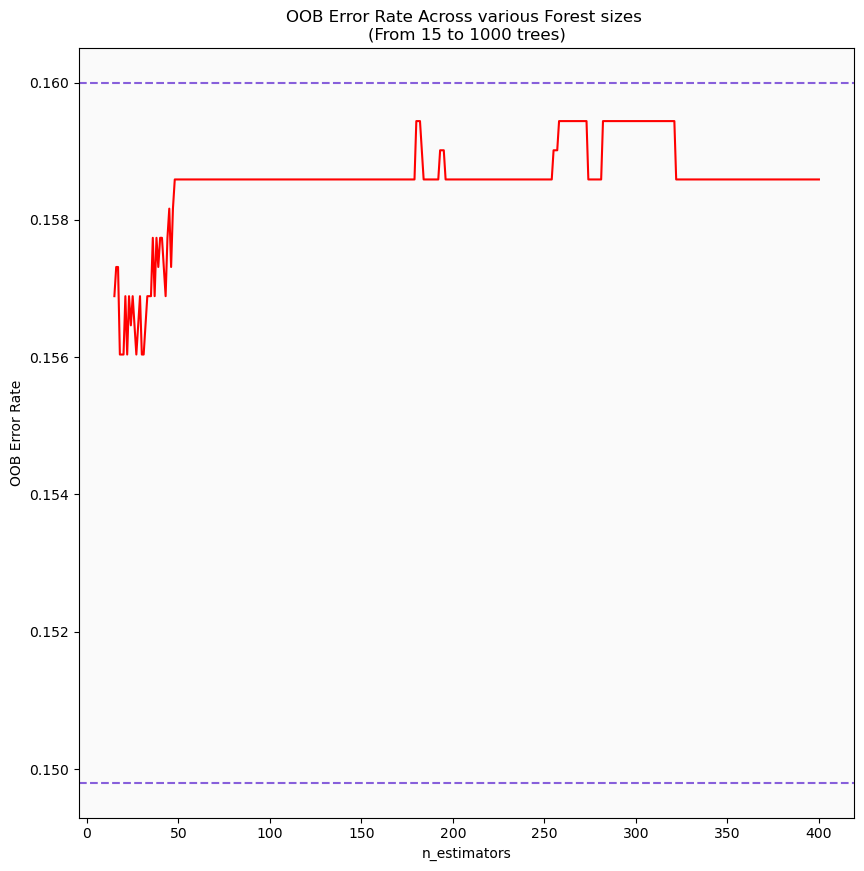

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.16, color='#875FDB',linestyle='--')
plt.axhline(0.1498, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [29]:
# Refine the tree via OOB Output
top_model_random_forest_tree.set_params(n_estimators=200,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, n_estimators=200)

In [30]:
top_model_random_forest_tree.fit(X_train, y_train)

MODEL_TRAIN_SCORE = top_model_random_forest_tree.score(X_train, y_train)

print(f"Training score for Model: {MODEL_TRAIN_SCORE * 100:.2f}%")

#test model

TEST_MODEL_SCORE = top_model_random_forest_tree.score(X_test, y_test)

print(f"Testing score for Model: {TEST_MODEL_SCORE * 100:.2f}%")

Training score for Model: 84.14%
Testing score for Model: 83.16%


In [31]:

y_pred = top_model_random_forest_tree.predict(X_test)

print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 83.16 %


In [32]:

print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8316326530612244
Precision Score :  0.8316326530612245
Recall Score :  0.8316326530612245
Jaccard Score :  0.7117903930131004
Log Loss :  6.068574295106459


In [17]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

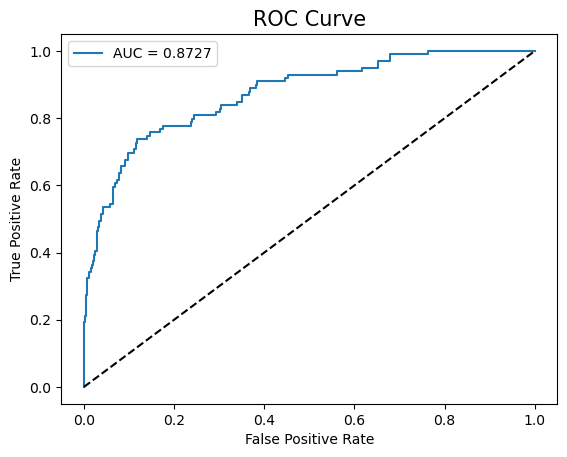

In [18]:

y_pred_proba = top_model_random_forest_tree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)


fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [37]:
joblib.dump(top_model_random_forest_tree, '../models/random_forest_tree_model.pkl')

['../models/random_forest_tree_model.pkl']

c:\Users\samee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)